# TRACKING BIRD MIGRATION USING PYTHON-3

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

IMPORT DATASET USING PANDAS

In [5]:
bird_data = pd.read_csv('bird_tracking.csv')
bird_data.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


NOW  WE HAVE TO KNOW SHAPE OF THIS DATASET(BASICALY KNOW NUMBER OF ROWS & COLUMNS)

In [7]:
bird_data.shape

(61920, 8)

In [8]:
bird_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 3.3+ MB


# NOW WE HAVE TO KNOW THE BIRD NAME WHICH IS PRESENT TO DATASET

In [10]:
bird_name = pd.unique(bird_data.bird_name)
bird_name

array(['Eric', 'Nico', 'Sanne'], dtype=object)

In [12]:
bird_data['bird_name'].value_counts()

Nico     21121
Sanne    21004
Eric     19795
Name: bird_name, dtype: int64

# 1) Visualizing Longitude & Latitude data of the Gulls : 

In [13]:
x = bird_data.bird_name == 'Eric'

In [14]:
a,b = bird_data.longitude[x],bird_data.latitude[x]

Now we have to plot a graph 

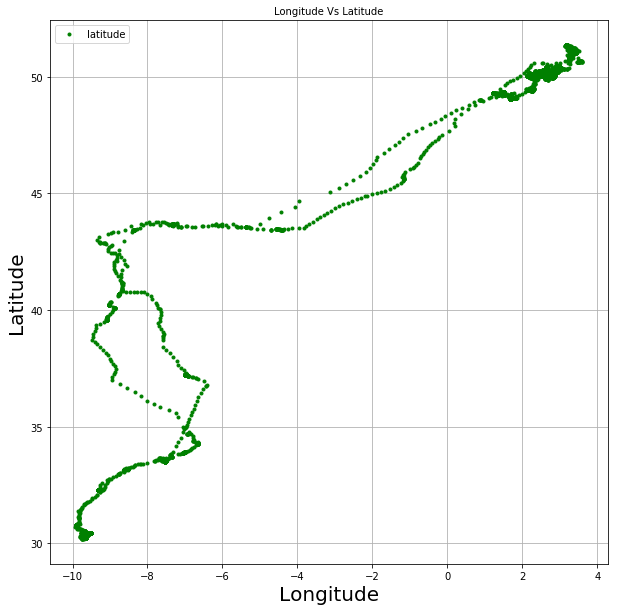

In [19]:
plt.figure(figsize = (10,10))
plt.plot(a,b,'.',color='green')
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.title('Longitude Vs Latitude',fontsize=10)
plt.legend(loc='upper left')
plt.grid()
plt.show()

# TO LOOK AT ALL THE BIRDS TRAJACTORIES : 
WE PLOT EACH BIRD IN THE SAME PLOT

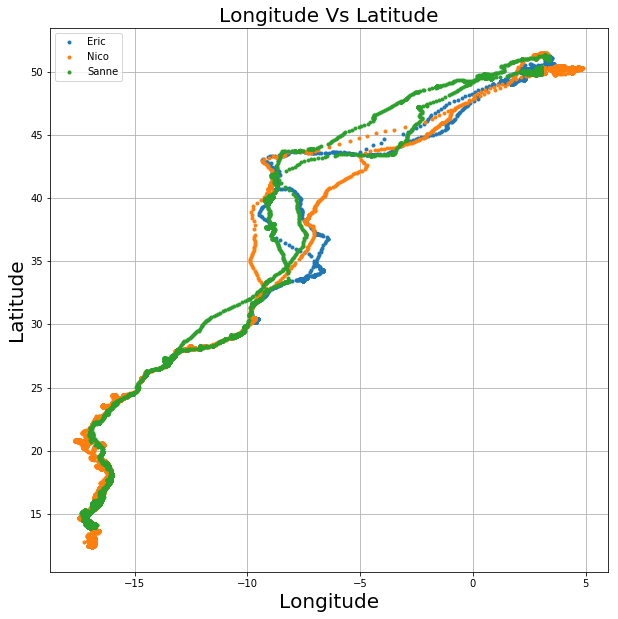

In [22]:
plt.figure(figsize = (10,10))
# plt.figure(facecolor='grey')

for b_name in bird_name:
    
    x = bird_data.bird_name == b_name
    a,b = bird_data.longitude[x],bird_data.latitude[x]
    plt.plot(a,b,'.',label=b_name)
    
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.title('Longitude Vs Latitude',fontsize=20)
plt.legend(loc='upper left')
plt.grid()
plt.show()

# 2) 2D Speed Vs Frequency

In [23]:
speed = bird_data.speed_2d[x]
speed.head()

40916    0.372156
40917    1.318484
40918    0.076158
40919    0.014142
40920    0.094340
Name: speed_2d, dtype: float64

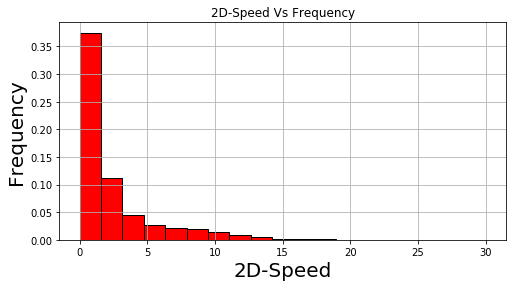

In [25]:
plt.figure(figsize=(8,4))
ind = np.isnan(speed)
plt.hist(speed[~ind],bins=np.linspace(0,30,20),normed=True,color='r',ec='black')
plt.xlabel('2D-Speed',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.title('2D-Speed Vs Frequency')
plt.grid()
plt.show()

# 3) Time And Date

In [26]:
ts = []
for i in range(len(bird_data)):
    
    ts.append(datetime.datetime.strptime(bird_data.date_time.iloc[i][:-3],'%Y-%m-%d %H:%M:%S'))
    
bird_data['ts'] = pd.Series(ts,index=bird_data.index)
bird_data.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,ts
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [27]:
times = bird_data.ts[bird_data.bird_name == 'Eric']

In [28]:
e_time = [time-times[0] for time in times]

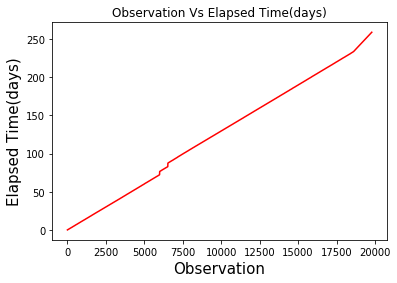

In [30]:
plt.plot(np.array(e_time)/datetime.timedelta(days=1),color='r')
plt.xlabel('Observation',fontsize=15)
plt.ylabel('Elapsed Time(days)',fontsize=15)
plt.title('Observation Vs Elapsed Time(days)')
plt.show()

# 4) Daily Mean Speed

In [31]:
next_day = 1
inds = []
dms = []

In [32]:
data = bird_data[bird_data.bird_name == 'Eric']
e_day = np.array(e_time)/datetime.timedelta(days=1)
e_day

array([0.0, 0.02082175925925926, 0.04155092592592593, ...,
       258.9399652777778, 258.9607175925926, 258.9814930555556],
      dtype=object)

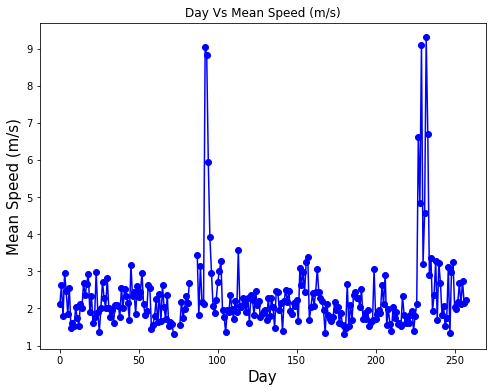

In [37]:
for (i,t) in enumerate(e_day):
    
    if t < next_day:
        inds.append(i)
    else:
        dms.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []

plt.figure(figsize = (8,6))
plt.plot(dms,'o-',color='b')
plt.xlabel('Day',fontsize=15)
plt.ylabel('Mean Speed (m/s)',fontsize=15)
plt.title('Day Vs Mean Speed (m/s)')
plt.show()

# 5) Cartographic View : 

In [38]:
import cartopy.crs as ccrs 
import cartopy.feature as cfeature 

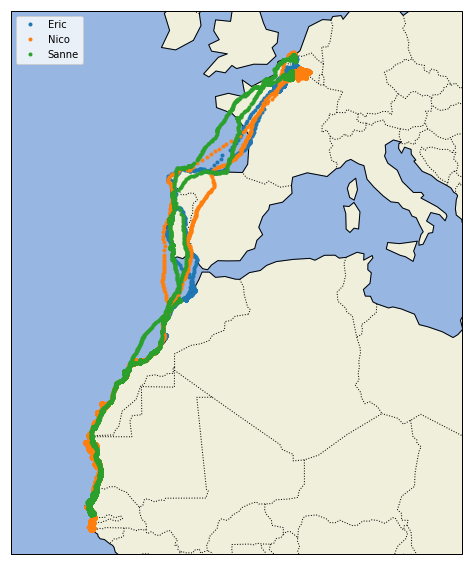

In [41]:
proj = ccrs.Mercator() 

plt.figure(figsize=(10,10)) 
ax = plt.axes(projection=proj) 
ax.set_extent((-25.0, 20.0, 52.0, 10.0)) 
ax.add_feature(cfeature.LAND) 
ax.add_feature(cfeature.OCEAN) 
ax.add_feature(cfeature.COASTLINE) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
for name in bird_name: 
	ix = bird_data['bird_name'] == name 
	x,y = bird_data.longitude[ix], bird_data.latitude[ix] 
	ax.plot(x,y,'.', transform=ccrs.Geodetic(), label=name) 
plt.legend(loc="upper left") 
plt.show() 
